## Clasificación por Particiones - Metodo del histograma

### Julian Ferres - Nro.Padrón 101483

## Enunciado

Sean las regiones $R_0$ y $R_1$ y la cantidad de puntos $n$, donde:

- $R_0$ es el triangulo con vertices $(1,0)$, $(1,1)$ y $(\frac{1}{2},0)$
- $R_1$ es el triangulo con vertices $(0,0)$, $(\frac{1}{2},1)$ y $(0,1)$

- $n = 10, 100, 1000, 10000, \ldots$

Se simulan $n$ puntos en $\mathbb{R}^2$ siguiendo los pasos:
    
>- Cada punto pertenece a una de las dos clases: **_Clase 0_** o **_Clase 1_** con probabilidad $\frac{1}{2}$

>- Los puntos de la clase $i$ tienen distribución uniforme con soporte en $R_i$ , con $i=0,1$

**Se pide, con la muestra, construir una regla del histograma que permita clasificar un punto que no pertenezca a la misma**

## Solución

In [57]:
#Import libraries
import numpy as np
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
n = 100000 #Tamaño de muestra

In [59]:
muestra = np.zeros((n,3))

#### Toma de muestra

In [60]:
i = 0 #Puntos incluidos hasta el momento.
while(i < n):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    clase = np.random.randint( 0 , 1 + 1 ) #Uniforme discreta en {0,1}
    if (( clase == 0 and abs(2*x-1) < y) or ( clase == 1 and y < 2*x < 2-y )):
        muestra[i][0] = x
        muestra[i][1] = y
        muestra[i][2] = clase
        i+=1

In [61]:
clase0 , clase1 = muestra[(muestra[:,2] == 0.)] , muestra[(muestra[:,2] == 1.)]

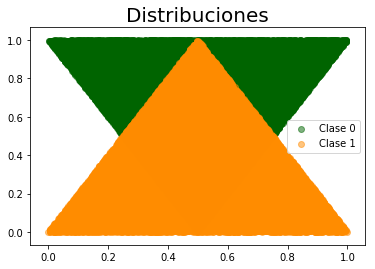

In [62]:
g = plt.scatter( clase0[:,0] , clase0[:,1] , alpha='0.5', color='darkgreen' , label = 'Clase 0');
g = plt.scatter( clase1[:,0] , clase1[:,1] ,alpha='0.5', color='darkorange' , label = 'Clase 1');
plt.legend()
plt.title("Distribuciones", fontsize=20)
plt.show()

### Para generar la particion tengo que saber la longitud del lado de las cajas.

#### Segun lo visto en clase, si $h_n$ es la longitud del lado de las cajas, entonces:
$$h_n = \frac {1}{\sqrt[2d]{n}} = n^{-\frac{1}{2d}}$$

cumple las condiciones para que la regla del histograma sea universalmente consistente.

 En este caso, con dos dimensiones, $d=2$:

In [63]:
d = 2
h_n = n **(-(1/(d*2))) 

d_n = int(1/h_n) #Podria 1/h_n no ser entero

In [64]:
particion = np.ndarray((d_n , d_n), dtype = int )
particion.fill(0)

In [65]:
for i in range(n):
    
    x_p , y_p = int(muestra[i,0]/h_n) , int(muestra[i,1]/h_n)
    
    x_p = d_n - 1 if x_p >=d_n else x_p
    y_p = d_n - 1 if y_p >=d_n else y_p
    
    particion[y_p , x_p] += 1 if muestra[i,2] else -1

In [66]:
f = lambda x : 0 if (x>= 0) else 1
f_vec = np.vectorize(f)

In [67]:
for_heatmap = f_vec(particion) #Mapeo todos los numeros a 0 o 1 

In [68]:
particion

array([[ 247,  297,  305,  329,  340,  307,  322,  307,  196,  232,  329,
         327,  329,  326,  376,  294,  487],
       [  72,  298,  333,  307,  283,  325,  293,  290,   41,  119,  301,
         285,  303,  324,  306,  299,  360],
       [   0,  227,  323,  318,  308,  325,  305,  194,    2,   -9,  253,
         320,  313,  327,  292,  330,  184],
       [   0,   71,  321,  335,  321,  311,  312,   40,  -52,    0,  117,
         285,  310,  328,  350,  331,   23],
       [   0,    0,  242,  293,  307,  275,  189,   -1,   -6,    2,   17,
         265,  332,  341,  318,  183,    0],
       [   0,    0,   71,  333,  313,  311,   41,   -3,  -33,  -56,  -24,
         152,  325,  317,  276,   19,    0],
       [   0,    0,    0,  257,  331,  194,  -55,   23,   -8,  -54,    0,
           7,  277,  330,  163,    0,    0],
       [   0,    0,    0,   82,  302,   60,    6,  -22,    4,  -44,  -26,
           8,  119,  324,   30,    0,    0],
       [   0,    0,    0,    0,  103,  -39,  -25

In [69]:
for_heatmap

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Clasificación mediante método del histograma

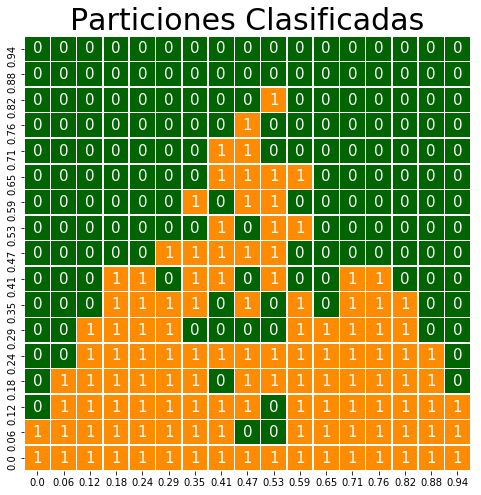

In [72]:
dims = (8, 8)
fig, axs = plt.subplots(figsize=dims)
annotable = (n<1000000)
g = sns.heatmap(for_heatmap, annot = annotable , linewidths=.5,cmap=['darkgreen','darkorange'],\
                cbar = False, annot_kws={"size": 15},\
                xticklabels = [round(x/d_n,2) for x in range(d_n)],\
                yticklabels = [(round(1-x/d_n,2)) for x in range(1,d_n+1)])

g.set_title('Particiones Clasificadas' , size = 30)
plt.show()

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git